In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

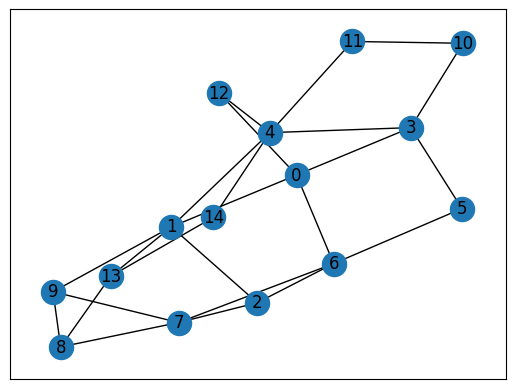

In [2]:
# undirected edges
edges = [
    (0,1),(0,3),(0,6),(0,12),
    (1,2),(1,4),(1,9),(1,13),
    (2,6),(2,7),(3,4),(3,5),
    (3,10),(4,11),(4,12),(4,14),
    (5,6),(6,7),(7,8),(7,9),
    (8,9),(8,13),(10,11),(13,14)
]

graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos)
plt.show()

In [3]:
# define q-value table
# let row be (s) and col be (s')
# set undefined edges to -1
qt = np.full((15,15), -1.0)
for edge in edges:
    qt[edge[0]][edge[1]] = 0.0
    qt[edge[1]][edge[0]] = 0.0

# define rewards based on destination
destination = 7
reward = np.full((15,15), 0.0)
for s in range(0, 15):
    if qt[s][destination] == 0.0:
        reward[s][destination] = 10.0

print("Initial Q-Value Table:\n", qt)
print("Reward Space:\n", reward)

Initial Q-Value Table:
 [[-1.  0. -1.  0. -1. -1.  0. -1. -1. -1. -1. -1.  0. -1. -1.]
 [ 0. -1.  0. -1.  0. -1. -1. -1. -1.  0. -1. -1. -1.  0. -1.]
 [-1.  0. -1. -1. -1. -1.  0.  0. -1. -1. -1. -1. -1. -1. -1.]
 [ 0. -1. -1. -1.  0.  0. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
 [-1.  0. -1.  0. -1. -1. -1. -1. -1. -1. -1.  0.  0. -1.  0.]
 [-1. -1. -1.  0. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0. -1.  0. -1. -1.  0. -1.  0. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  0. -1. -1. -1.  0. -1.  0.  0. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  0. -1.  0. -1. -1. -1.  0. -1.]
 [-1.  0. -1. -1. -1. -1. -1.  0.  0. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1.]
 [-1. -1. -1. -1.  0. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.]
 [ 0. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1.  0.]
 [-1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1.]]
Reward Space:
 [[ 0.  0.  0.  

In [4]:
# learning hyperparameters
trials = 10000
eps = 0.50 # exploration rate
alpha = 0.10 # learning rate
gamma = 0.80 # discount factor

In [5]:
# learn q-values
for t in range(trials):
    s = np.random.randint(0,15) # randomly select (s)
    # epsilon-greedy policy
    # select (s')
    explore = np.random.rand()
    if explore < eps:
        sp = np.random.choice(np.where(qt[s] != -1)[0])
    else:
        sp = np.argmax(qt[s])
    
    # update q-value
    qt[s][sp] = qt[s][sp] + alpha * (reward[s][sp] + gamma * np.max(qt[sp]) - qt[s][sp])

print(np.round(qt, 0))

[[-1. 18. -1. 14. -1. -1. 22. -1. -1. -1. -1. -1. 14. -1. -1.]
 [18. -1. 22. -1. 14. -1. -1. -1. -1. 22. -1. -1. -1. 18. -1.]
 [-1. 18. -1. -1. -1. -1. 22. 28. -1. -1. -1. -1. -1. -1. -1.]
 [18. -1. -1. -1. 14. 18. -1. -1. -1. -1. 11. -1. -1. -1. -1.]
 [-1. 18. -1. 14. -1. -1. -1. -1. -1. -1. -1. 11. 14. -1. 14.]
 [-1. -1. -1. 14. -1. -1. 22. -1. -1. -1. -1. -1. -1. -1. -1.]
 [18. -1. 22. -1. -1. 18. -1. 28. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. 22. -1. -1. -1. 22. -1. 22. 22. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. 28. -1. 22. -1. -1. -1. 18. -1.]
 [-1. 18. -1. -1. -1. -1. -1. 28. 22. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. 14. -1. -1. -1. -1. -1. -1. -1. 11. -1. -1. -1.]
 [-1. -1. -1. -1. 14. -1. -1. -1. -1. -1. 11. -1. -1. -1. -1.]
 [18. -1. -1. -1. 14. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. 18. -1. -1. -1. -1. -1. -1. 22. -1. -1. -1. -1. -1. 14.]
 [-1. -1. -1. -1. 14. -1. -1. -1. -1. -1. -1. -1. -1. 18. -1.]]


In [6]:
start = int(input("Enter starting node: "))

s = start
path = [start]
while s != destination:
    s = np.argmax(qt[s])
    path.append(s)

print("Shortest path = {}" .format(path))

Enter starting node: 11
Shortest path = [11, 4, 1, 9, 7]
